Program membaca data rekaman linear acceleration


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as num
from scipy.signal import butter, filtfilt

In [ ]:
LinearA = pd.read_csv("Raw Data.csv")
df.head()

Text(0.5, 1.0, 'z')

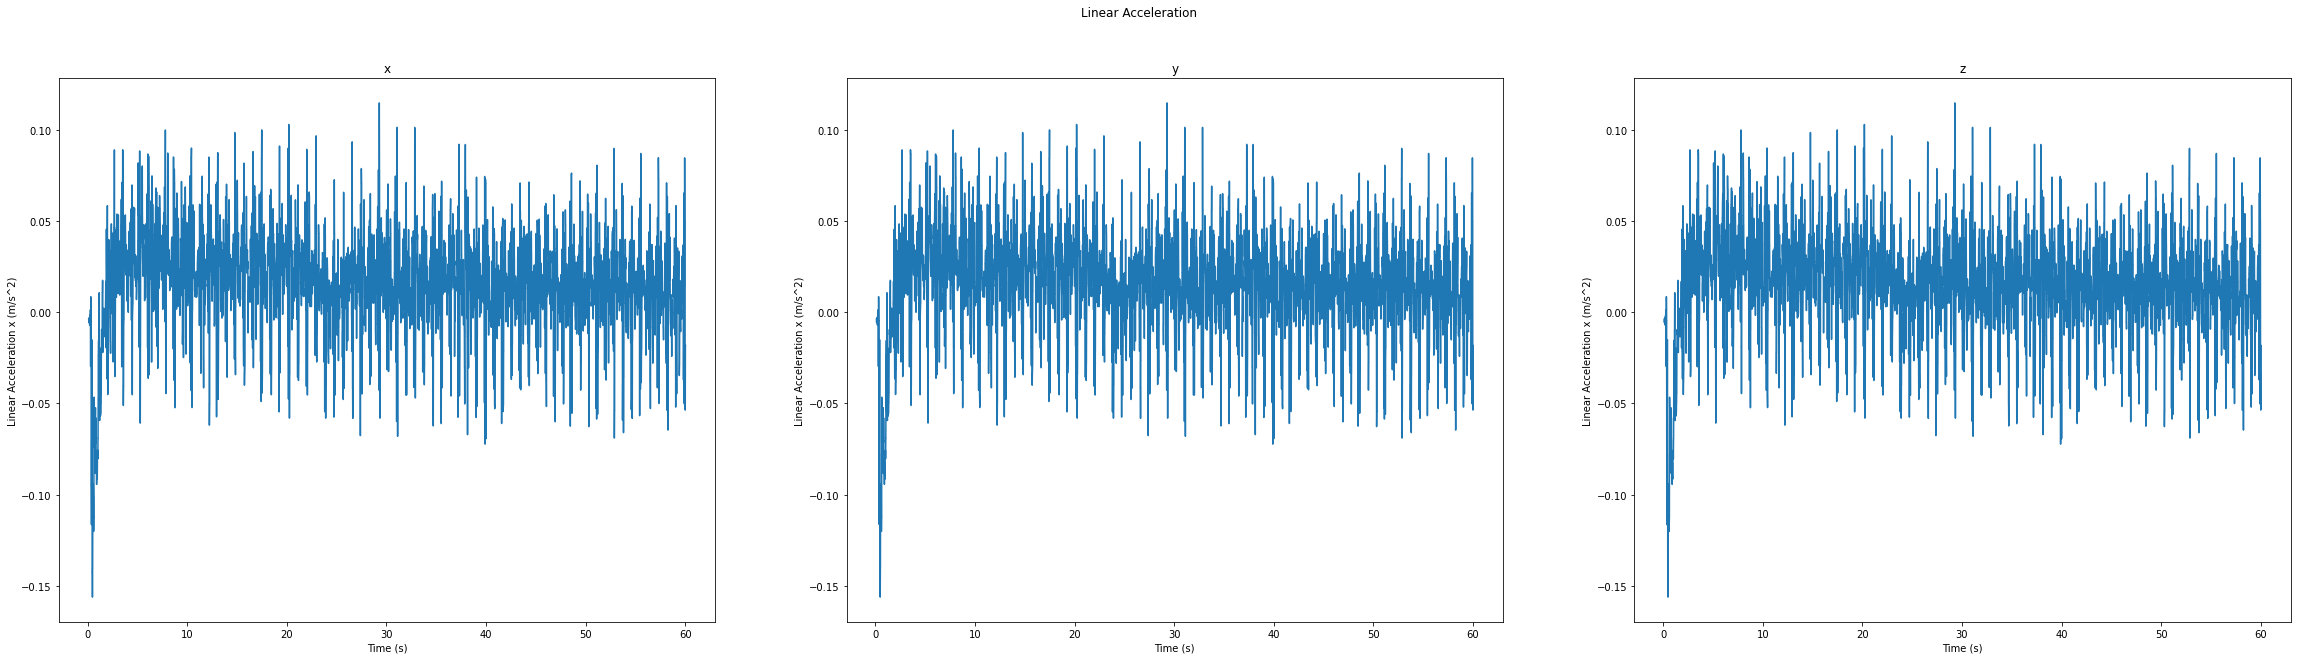

In [ ]:
LinearA
fig, axes = plt.subplots(1, 3,figsize=(40,10))
fig.suptitle('Linear Acceleration')

sn.lineplot(ax=axes[0], data=LinearA, x='Time (s)', y='Linear Acceleration x (m/s^2)', ci=None)
axes[0].set_title('x')
sn.lineplot(ax=axes[1], data=LinearA, x='Time (s)', y='Linear Acceleration x (m/s^2)', ci=None)
axes[1].set_title('y')
sn.lineplot(ax=axes[2], data=LinearA, x='Time (s)', y='Linear Acceleration x (m/s^2)', ci=None)
axes[2].set_title('z')

Program untuk menentukan sudut acceleremotor

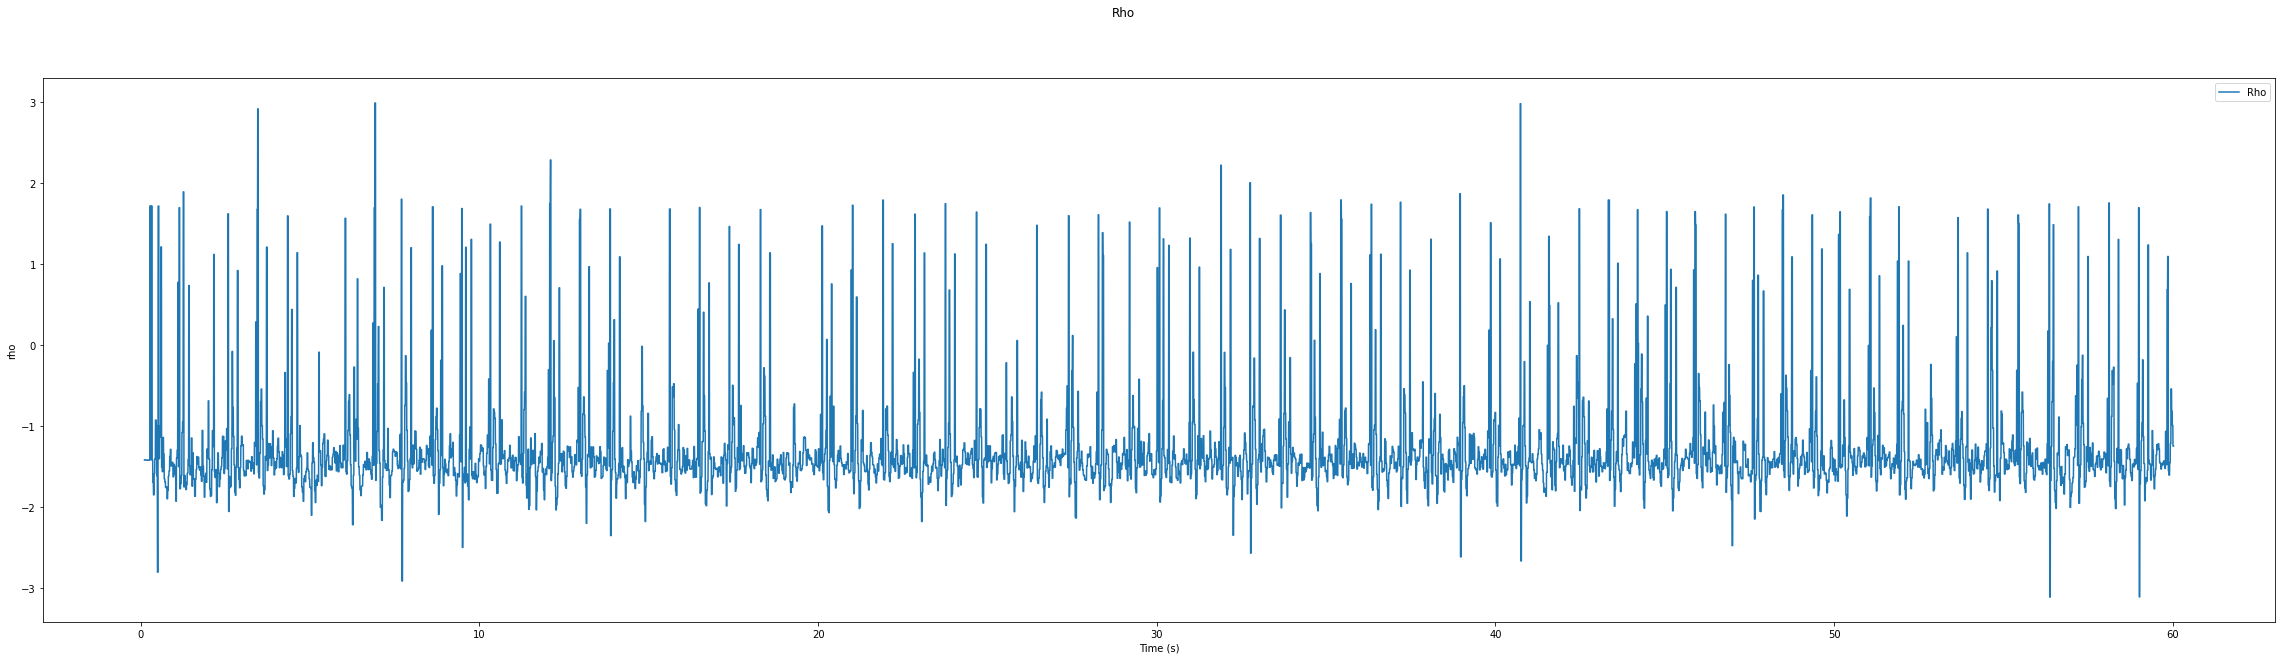

In [ ]:
df_rho = pd.DataFrame()
for idx in range(len(LinearA)):
  rho = num.arctan2(LinearA.loc[idx, "Linear Acceleration z (m/s^2)"], LinearA.loc[idx, "Linear Acceleration y (m/s^2)"])
  data = pd.Series(data={'rho' : rho, 'Time (s)' :LinearA.loc[idx, "Time (s)"]})
  df_rho = df_rho.append(data, ignore_index=True)

fig, axes = plt.subplots(1, figsize=(40,10))
fig.suptitle('Rho')
sn.lineplot(ax=axes, data=df_rho, x='Time (s)', y='rho', ci=None, label='Rho')

Perbandingan antara sudut accelerometer dengan metode inklinasi dengan sudut accelerometer dominan 

[Text(0, 0.5, 'Rho')]

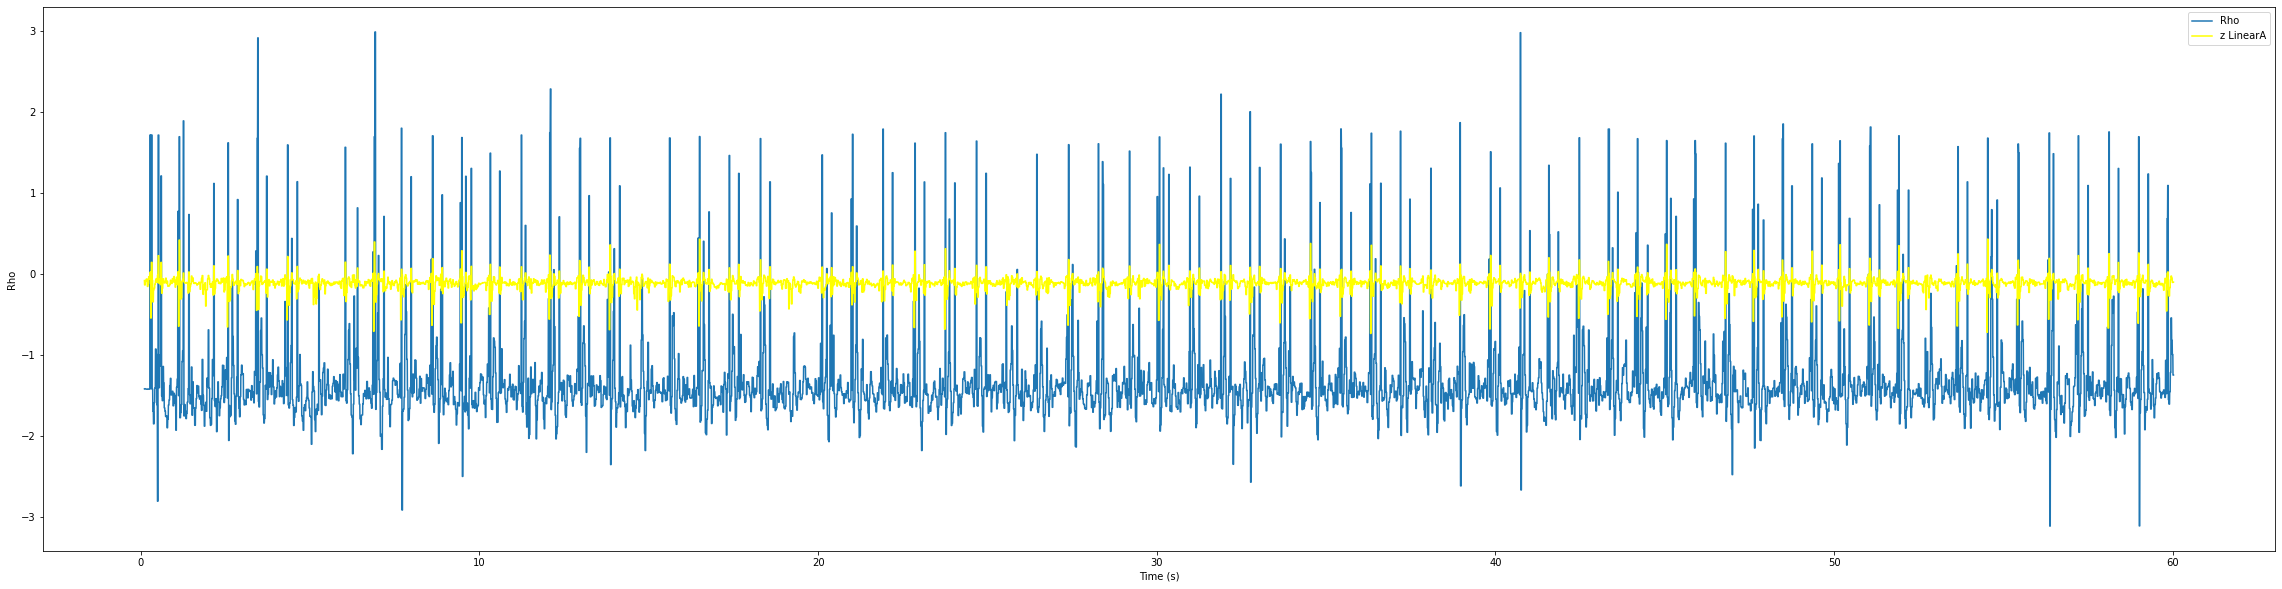

In [ ]:
df_rho
fig, axes = plt.subplots(1, figsize=(40,10))

sn.lineplot(ax=axes, data=df_rho, x='Time (s)', y='rho', ci=None, label='Rho')
sn.lineplot(ax=axes, data=LinearA, x='Time (s)', y='Linear Acceleration z (m/s^2)', ci=None, color='yellow', label="z LinearA")
axes.set(ylabel = 'Rho')

LPF metode 1 & 2

In [ ]:
import numpy as np
from scipy.signal import butter,filtfilt

data1 = pd.DataFrame(LinearA)['Linear Acceleration z (m/s^2)']

In [ ]:
data1

0       -0.078415
1       -0.132992
2       -0.132992
3       -0.132992
4       -0.132992
           ...   
12262   -0.102612
12263   -0.097781
12264   -0.097781
12265   -0.097781
12266   -0.097781
Name: Linear Acceleration z (m/s^2), Length: 12267, dtype: float64

ValueError: ignored

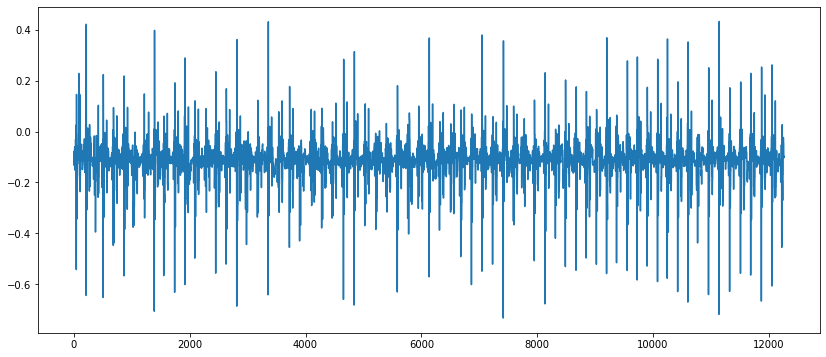

In [ ]:
%matplotlib inline 

L = 1000

# init
LPF_results = []
LPF_out = data1
_SamplingTime = 60.0
cut_f = 0.8

# main loop
for i in range(L):
    x_in = data1
    # LPF
    LPF_out += cut_f * (x_in - LPF_out) * _SamplingTime
    LPF_results.append(LPF_out)

fig = plt.figure(figsize=(14,6))
x_plot = np.arange(0,12267)
plt.plot(x_plot, data1, label='raw data')
plt.plot(x_plot, LPF_results, label='cut-off=0.8Hz')
plt.xlim(0,10)
plt.xlabel('Time(sec)')
plt.legend()

In [ ]:
data2 = pd.DataFrame(df_rho)['rho']

ValueError: ignored

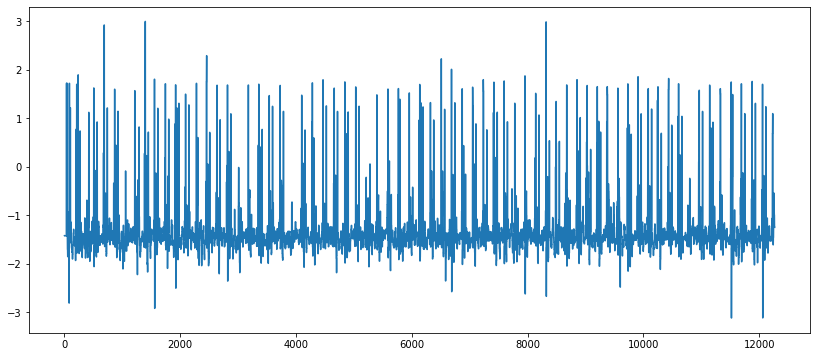

In [ ]:
%matplotlib inline 

L = 1000

# init
LPF_results = []
LPF_out = data2
_SamplingTime = 60.0
cut_f = 0.8

# main loop
for i in range(L):
    x_in = data2
    # LPF
    LPF_out += cut_f * (x_in - LPF_out) * _SamplingTime
    LPF_results.append(LPF_out)

fig = plt.figure(figsize=(14,6))
x_plot = np.arange(0,12267)
plt.plot(x_plot, data2, label='raw data')
plt.plot(x_plot, LPF_results, label='cut-off=0.8Hz')
plt.xlim(0,10)
plt.xlabel('Time(sec)')
plt.legend()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
from scipy.signal import find_peaks

data2peak = pd.DataFrame(LinearA)
peakd2 = data2peak['Linear Acceleration z (m/s^2)']

indices2 = find_peaks(peakd2, threshold=0)[0]

fig = go.Figure()
fig.add_trace(go.Scatter(
    y=peakd2,
    mode='lines+markers',
    name='Original Plot'
))

fig.add_trace(go.Scatter(
    x=indices2,
    y=[peakd2[j] for j in indices2],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.show()

In [ ]:
print('Peaks are: %s') 
len(indices2)

Peaks are: %s


866

In [ ]:
import numpy as np
import scipy.signal

print('Detect peaks without any filters.')
indexes = scipy.signal.find_peaks_cwt(peakd2, np.arange(1, 1000),
    max_distances=np.arange(1, 1000)*2)
indexes = np.array(indexes) - 1
print(len(indexes))

Detect peaks without any filters.
13


In [ ]:
import plotly.graph_objects as go
import pandas as pd
from scipy.signal import find_peaks

data1peak = pd.DataFrame(df_rho)
peakd1 = data1peak['rho']

indices1 = find_peaks(peakd1, threshold=0)[0]

fig = go.Figure()
fig.add_trace(go.Scatter(
    y=peakd1,
    mode='lines+markers',
    name='Original Plot'
))

fig.add_trace(go.Scatter(
    x=indices1,
    y=[peakd1[j] for j in indices1],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.show()

In [ ]:
print('Peaks are: %s') 
len(indices1)

Peaks are: %s


789

In [ ]:
import numpy as np
import scipy.signal

print('Detect peaks without any filters.')
indexes = scipy.signal.find_peaks_cwt(peakd1, np.arange(1, 1000),
    max_distances=np.arange(1, 1000)*2)
indexes = np.array(indexes) - 1
print(len(indexes))

Detect peaks without any filters.
14
